In [1]:
!rm My_first_dataset_neo9.nwb

rm: cannot remove 'My_first_dataset_neo9.nwb': No such file or directory


In [2]:
# Pip installs
!pip install pynwb
!pip install nwb-docutils
!pip install git+https://github.com/legouee/python-neo@NWB_updated

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Cloning https://github.com/legouee/python-neo (to NWB_updated) to /tmp/pip-2ma6_kxh-build
You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import neo
from neo import Block, Segment, AnalogSignal
from neo.io.nwbio import NWBIO
import pynwb
import quantities as pq
from quantities import s, ms, kHz, Hz, uV
import numpy as np
print("neo = ", neo.__version__)
print("pynwb = ", pynwb.__version__)

neo =  0.9.0.dev
pynwb =  1.1.2


# Create a nwb file from Neo

## Create 3 Neo blocks and populate each block with 4 Neo segments, and each segment with 3 Neo analogsignals objects

In [4]:
blocks = []

# Define Neo blocks
bl0 = neo.Block(name='First block')
bl1 = neo.Block(name='Second block')
bl2 = neo.Block(name='Third block')
print("bl0.segments = ", bl0.segments)      
print("bl1.segments = ", bl1.segments)
print("bl2.segments = ", bl2.segments)
blocks = [bl0, bl1, bl2]
print("blocks = ", blocks)

num_seg = 4 # number of segments

for blk in blocks: 
    for ind in range(num_seg): # number of Segment
        seg = neo.Segment(name='segment %s %d' % (blk.name, ind), index=ind)
        blk.segments.append(seg)

    for seg in blk.segments: # AnalogSignal objects
        # 3 AnalogSignals
        a = AnalogSignal(np.random.randn(num_seg, 44)*pq.nA, sampling_rate=10*kHz)
        b = AnalogSignal(np.random.randn(num_seg, 64)*pq.nA, sampling_rate=10*kHz)
        c = AnalogSignal(np.random.randn(num_seg, 33)*pq.nA, sampling_rate=10*kHz)

        seg.analogsignals.append(a)
        seg.analogsignals.append(b)
        seg.analogsignals.append(c)

blocks

bl0.segments =  []
bl1.segments =  []
bl2.segments =  []
blocks =  [<neo.core.block.Block object at 0x7fa6d6a241d0>, <neo.core.block.Block object at 0x7fa6d6a24198>, <neo.core.block.Block object at 0x7fa6d6a242b0>]


[Block with 4 segments
 name: 'First block'
 # segments (N=4)
 0: Segment with 3 analogsignals
    name: 'segment First block 0'
    # analogsignals (N=3)
    0: AnalogSignal with 44 channels of length 4; units nA; datatype float64 
       sampling rate: 10.0 kHz
       time: 0.0 s to 0.0004 s
    1: AnalogSignal with 64 channels of length 4; units nA; datatype float64 
       sampling rate: 10.0 kHz
       time: 0.0 s to 0.0004 s
    2: AnalogSignal with 33 channels of length 4; units nA; datatype float64 
       sampling rate: 10.0 kHz
       time: 0.0 s to 0.0004 s
 1: Segment with 3 analogsignals
    name: 'segment First block 1'
    # analogsignals (N=3)
    0: AnalogSignal with 44 channels of length 4; units nA; datatype float64 
       sampling rate: 10.0 kHz
       time: 0.0 s to 0.0004 s
    1: AnalogSignal with 64 channels of length 4; units nA; datatype float64 
       sampling rate: 10.0 kHz
       time: 0.0 s to 0.0004 s
    2: AnalogSignal with 33 channels of length 4; un

# Write a nwb file

## Using Neo NWBIO

In [5]:
filename = 'My_first_dataset_neo9.nwb'

In [6]:
writer = NWBIO(filename, mode='w')
writer.write(blocks)

block in all_blocks =  <neo.core.block.Block object at 0x7fa6d6a241d0>
segment.name =  segment First block 0
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment First block 1
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment First block 2
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment First block 3
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2


/opt/conda/lib/python3.6/site-packages/pynwb/file.py:691: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")
/opt/conda/lib/python3.6/site-packages/hdmf/build/map.py:949: MissingRequiredWarning: attribute 'unit' for 'data' (TimeSeries)
  warnings.warn(msg, MissingRequiredWarning)


block in all_blocks =  <neo.core.block.Block object at 0x7fa6d6a24198>
segment.name =  segment Second block 0
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Second block 1
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Second block 2
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Second block 3
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
block in all_blocks =  <neo.core.block.Block object at 0x7fa6d6a242b0>
segment.name =  segment Third block 0
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Third block 1
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Third block 2
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Third block 3
signal_name =  signal0
signal_name =  signal1
signal_name =  signal

# Read the NWB file

## Using pynwb

In [7]:
io = pynwb.NWBHDF5IO(filename, mode='r') # Open a file with NWBHDF5IO
_file = io.read()

In [8]:
print(_file)
_file.acquisition

root pynwb.file.NWBFile at 0x140356112966712
Fields:
  acquisition: {
    segment First block 0 <class 'pynwb.base.TimeSeries'>,
    segment First block 1 <class 'pynwb.base.TimeSeries'>,
    segment First block 2 <class 'pynwb.base.TimeSeries'>,
    segment First block 3 <class 'pynwb.base.TimeSeries'>,
    segment Second block 0 <class 'pynwb.base.TimeSeries'>,
    segment Second block 1 <class 'pynwb.base.TimeSeries'>,
    segment Second block 2 <class 'pynwb.base.TimeSeries'>,
    segment Second block 3 <class 'pynwb.base.TimeSeries'>,
    segment Third block 0 <class 'pynwb.base.TimeSeries'>,
    segment Third block 1 <class 'pynwb.base.TimeSeries'>,
    segment Third block 2 <class 'pynwb.base.TimeSeries'>,
    segment Third block 3 <class 'pynwb.base.TimeSeries'>
  }
  file_create_date: [datetime.datetime(2020, 1, 16, 15, 27, 26, 719229, tzinfo=tzlocal())]
  session_description: My_first_dataset_neo9.nwb
  session_start_time: 2020-01-16 15:27:26.713582+00:00
  timestamps_referen

{'segment First block 0': segment First block 0 pynwb.base.TimeSeries at 0x140354542269440
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (4, 33), type "<f8">
   interval: 1
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (1,), type "<f8">
   timestamps_unit: seconds,
 'segment First block 1': segment First block 1 pynwb.base.TimeSeries at 0x140354533740384
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (4, 33), type "<f8">
   interval: 1
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (1,), type "<f8">
   timestamps_unit: seconds,
 'segment First block 2': segment First block 2 pynwb.base.TimeSeries at 0x140354530931264
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (4, 33), type "<f8">
   interval: 1
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (1,), type "<f8">
   timestamps_unit: seconds,
 

## Using Neo NWBIO

In [9]:
reader = NWBIO(filename, mode='r')

In [10]:
all_blocks = reader.read()

node =  segment First block 0
node =  segment First block 1
node =  segment First block 2
node =  segment First block 3
node =  segment Second block 0
node =  segment Second block 1
node =  segment Second block 2
node =  segment Second block 3
node =  segment Third block 0
node =  segment Third block 1
node =  segment Third block 2
node =  segment Third block 3


In [11]:
all_blocks

[Block with 1 segments
 description: 'My_first_dataset_neo9.nwb'
 annotations: {'file_access_dates': [datetime.datetime(2020, 1, 16, 15, 27, 26, 719229, tzinfo=tzlocal())],
   'file_read_log': ''}
 file_origin: 'My_first_dataset_neo9.nwb'
 file_datetime: [datetime.datetime(2020, 1, 16, 15, 27, 26, 719229, tzinfo=tzlocal())]
 rec_datetime: datetime.datetime(2020, 1, 16, 15, 27, 26, 713582, tzinfo=tzlocal())
 # segments (N=1)
 0: Segment with  name: 'NeoNWB IO' # analogsignals (N=0),
 Block with 1 segments
 description: 'My_first_dataset_neo9.nwb'
 annotations: {'file_access_dates': [datetime.datetime(2020, 1, 16, 15, 27, 26, 719229, tzinfo=tzlocal())],
   'file_read_log': ''}
 file_origin: 'My_first_dataset_neo9.nwb'
 file_datetime: [datetime.datetime(2020, 1, 16, 15, 27, 26, 719229, tzinfo=tzlocal())]
 rec_datetime: datetime.datetime(2020, 1, 16, 15, 27, 26, 713582, tzinfo=tzlocal())
 # segments (N=1)
 0: Segment with  name: 'NeoNWB IO' # analogsignals (N=0),
 Block with 1 segments
 de

In [12]:
first_block = reader.read_block() # Read the first block

node =  segment First block 0
node =  segment First block 1
node =  segment First block 2
node =  segment First block 3
node =  segment Second block 0
node =  segment Second block 1
node =  segment Second block 2
node =  segment Second block 3
node =  segment Third block 0
node =  segment Third block 1
node =  segment Third block 2
node =  segment Third block 3


In [13]:
first_block

Block with 1 segments
description: 'My_first_dataset_neo9.nwb'
annotations: {'file_access_dates': [datetime.datetime(2020, 1, 16, 15, 27, 26, 719229, tzinfo=tzlocal())],
  'file_read_log': ''}
file_origin: 'My_first_dataset_neo9.nwb'
file_datetime: [datetime.datetime(2020, 1, 16, 15, 27, 26, 719229, tzinfo=tzlocal())]
rec_datetime: datetime.datetime(2020, 1, 16, 15, 27, 26, 713582, tzinfo=tzlocal())
# segments (N=1)
0: Segment with  name: 'NeoNWB IO' # analogsignals (N=0)

output_filenames =  My_first_dataset_neo9.nwb
filenames =  My_first_dataset_neo9.nwb


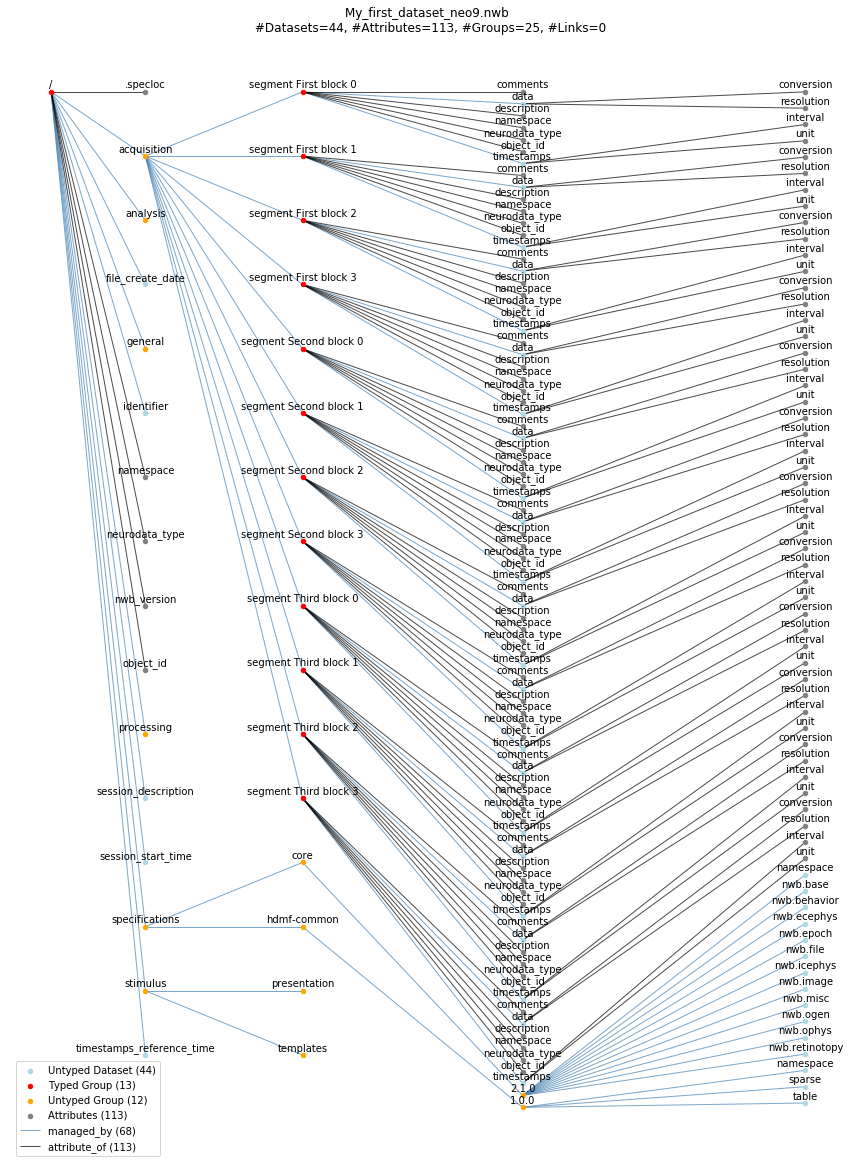

In [14]:
# Plotting settings
%matplotlib inline
show_bar_plot = False    # Change setting to plot distribution of object sizes in the HDF5 file
plot_single_file = True # Plot all files or a single example file
output_filenames = filename
print("output_filenames = ", output_filenames)
    
# Select the files to plot
filenames = output_filenames
print("filenames = ", filenames)

# Changed
from nwb_docutils.doctools.render import HierarchyDescription, NXGraphHierarchyDescription
import matplotlib.pyplot as plt
        
# Create the plots for all files
file_hierarchy = HierarchyDescription.from_hdf5(filenames)
file_graph = NXGraphHierarchyDescription(file_hierarchy)          
fig = file_graph.draw(show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10)
plot_title = filenames + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()
        
# Show a sorted bar plot with the sizes of all datasets in the file
if show_bar_plot:
    d = {i['name']: np.prod(i['size']) for i in file_hierarchy['datasets']}
    l = [w for w in sorted(d, key=d.get, reverse=True)]
    s = [d[w] for w in l]   
    p = np.arange(len(l))   
    fig,ax = plt.subplots(figsize=(16,7))
    ax.set_title(filename)
    ax.bar(p, s, width=1, color='r')
    ax.set_xticks(p+1)  
    ax.set_xticklabels(l)  
    ax.set_yscale("log", nonposy='clip')
    fig.autofmt_xdate(bottom=0.2, rotation=90, ha='right')
    plt.show()
plt.show()